# OpenCV DNN 모듈을 이용해 Infenece
### 이미지 다운로드

In [30]:
!mkdir /content/data
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

--2021-07-14 11:44:02--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘./data/beatles01.jpg’

./data/beatles01.jp 100%[===================>] 374.14K  --.-KB/s    in 0.02s   

2021-07-14 11:44:02 (23.7 MB/s) - ‘./data/beatles01.jpg’ saved [383118/383118]



In [55]:
!wget -O ./data/baseball01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg

--2021-07-14 12:19:08--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76279 (74K) [image/jpeg]
Saving to: ‘./data/baseball01.jpg’

./data/baseball01.j 100%[===================>]  74.49K  --.-KB/s    in 0.006s  

2021-07-14 12:19:08 (12.9 MB/s) - ‘./data/baseball01.jpg’ saved [76279/76279]



### 비디오 다운로드

In [57]:
!wget -O ./data/Jonh_Wick_small.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true

--2021-07-14 12:20:28--  https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4 [following]
--2021-07-14 12:20:29--  https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4 [following]
--2021-07-14 12:20:29--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.

### Tensorflow Pretrained된 Inference모델과 config파일을 다운로드 받고 이용해 OpenCV에서 모델 생성
-  https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API

In [23]:
!mkdir ./pretrained

!wget -O ./pretrained/ssd_inception_v2_coco_2017_11_17.tar.gz  http://download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2017_11_17.tar.gz
!wget -O ./pretrained/ssd_inception_v2_config.pbtxt  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/ssd_inception_v2_coco_2017_11_17.pbtxt

!tar -xvf ./pretrained/ssd_inception_v2_coco_2017_11_17.tar.gz -C ./pretrained


mkdir: cannot create directory ‘./pretrained’: File exists
--2021-07-14 11:42:19--  http://download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2017_11_17.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.140.128, 2a00:1450:400c:c08::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.140.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 278126337 (265M) [application/x-tar]
Saving to: ‘./pretrained/ssd_inception_v2_coco_2017_11_17.tar.gz’

./pretrained/ssd_in 100%[===================>] 265.24M   228MB/s    in 1.2s    

2021-07-14 11:42:21 (228 MB/s) - ‘./pretrained/ssd_inception_v2_coco_2017_11_17.tar.gz’ saved [278126337/278126337]

--2021-07-14 11:42:21--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/ssd_inception_v2_coco_2017_11_17.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Conne

In [24]:
!pwd
!ls -lia ./pretrained/ssd*

/content
 7179 -rw-r--r-- 1 root   root 278126337 Nov 18  2017 ./pretrained/ssd_inception_v2_coco_2017_11_17.tar.gz
 7190 -rw-r--r-- 1 root   root    117525 Jul 14 11:42 ./pretrained/ssd_inception_v2_config.pbtxt

./pretrained/ssd_inception_v2_coco_2017_11_17:
total 201120
17079 drwxr-x--- 3 275875 5000      4096 Nov 18  2017 .
17078 drwxr-xr-x 4 root   root      4096 Jul 14 11:42 ..
 7189 -rw-r----- 1 275875 5000        77 Nov 18  2017 checkpoint
 7184 -rw-r----- 1 275875 5000 101987441 Nov 18  2017 frozen_inference_graph.pb
 7185 -rw-r----- 1 275875 5000 100214372 Nov 18  2017 model.ckpt.data-00000-of-00001
 7182 -rw-r----- 1 275875 5000     18073 Nov 18  2017 model.ckpt.index
 7183 -rw-r----- 1 275875 5000   3701354 Nov 18  2017 model.ckpt.meta
17080 drwxr-x--- 3 275875 5000      4096 Nov 18  2017 saved_model


In [29]:
import numpy as np
import pandas as pd
import cv2
import os
import re

import matplotlib.pyplot as plt

### modeling

In [27]:
cv_net = cv2.dnn.readNetFromTensorflow('/content/pretrained/ssd_inception_v2_coco_2017_11_17/frozen_inference_graph.pb',
                                       '/content/pretrained/ssd_inception_v2_config.pbtxt')

In [28]:
# label명 지정

labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

(633, 806, 3)


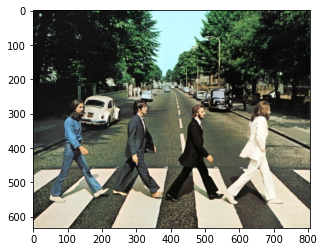

In [37]:
img = cv2.imread('/content/data/beatles01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(img.shape)
plt.imshow(img_rgb)
plt.show()

person : 0.97 1
person : 0.97 1
person : 0.89 1
person : 0.63 1
car : 0.86 3
car : 0.72 3
car : 0.72 3
car : 0.71 3
car : 0.59 3
car : 0.55 3


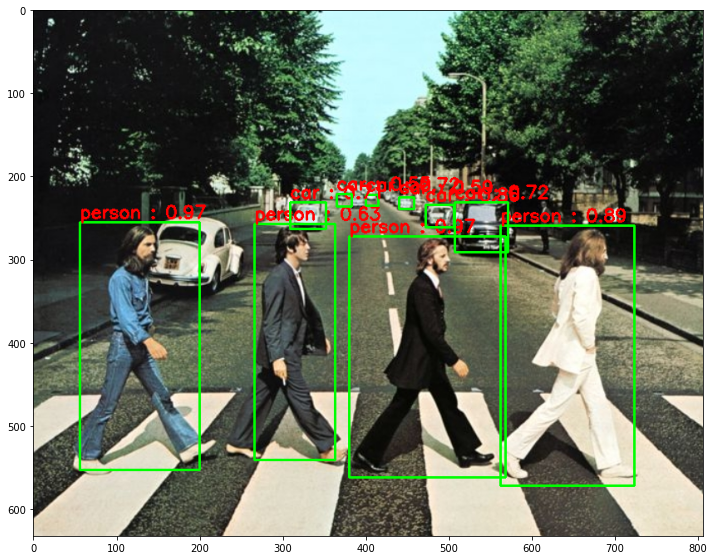

In [67]:
img = cv2.imread('/content/data/beatles01.jpg')

rows = img.shape[0]
cols = img.shape[1]

img_copy = img.copy()

# 원본 이미지 배열 사이즈를 300,300 으로 / BGR을 RGB로 변환하여 배열 입력
cv_net.setInput(cv2.dnn.blobFromImage(img_copy, size=(300,300), swapRB=True, crop=False))

pred = cv_net.forward()

green_color = (0,255,0)
red_color = (0,0,255)

for detection in pred[0,0,:,:]:
  score = float(detection[2])
  class_id = int(detection[1])
  
  if score > 0.4:
    x1 = int(detection[3] * cols)
    y1 = int(detection[4] * rows)
    x2 = int(detection[5] * cols)
    y2 = int(detection[6] * rows)

    caption = '{} : {:.2f}'.format(labels_to_names[class_id], score)
    cv2.rectangle(img_copy, (x1,y1),(x2,y2), color=green_color, thickness=2)
    cv2.putText(img_copy, caption, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, red_color, 2)
    print(caption, class_id)

img_rgb = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,12))
plt.imshow(img_rgb)
plt.show()

In [76]:
import time

def get_detected_img(cv_net, img_array, score_threshold, is_print=True):
  img_copy = img_array.copy()
  rows = img_array.shape[0]
  cols = img_array.shape[1]

  start = time.time()
  cv_net.setInput(cv2.dnn.blobFromImage(img_copy, size=(300,300), swapRB=True, crop=False))

  pred = cv_net.forward()

  green_color = (0,255,0)
  red_color = (0,0,255)

  for detection in pred[0,0,:,:]:
    score = float(detection[2])
    class_id = int(detection[1])
    
    if score > score_threshold:
      x1 = int(detection[3] * cols)
      y1 = int(detection[4] * rows) 
      x2 = int(detection[5] * cols)
      y2 = int(detection[6] * rows)

      caption = '{} : {:.2f}'.format(labels_to_names[class_id], score)
      cv2.rectangle(img_copy, (x1,y1),(x2,y2), color=green_color, thickness=2)
      cv2.putText(img_copy, caption, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, red_color, 2)
  
  if is_print:
    print("Detection Time : {}".format(round(time.time() - start)))
  
  return img_copy

Detection Time : 0


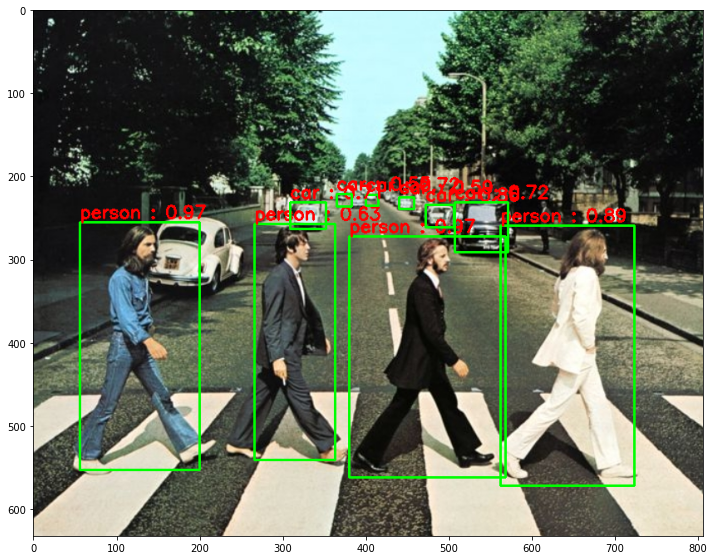

In [77]:
img = cv2.imread('/content/data/beatles01.jpg')

draw_img = get_detected_img(cv_net, img, score_threshold=0.5, is_print=True)
img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,12))
plt.imshow(img_rgb)
plt.show()

Detection Time : 0


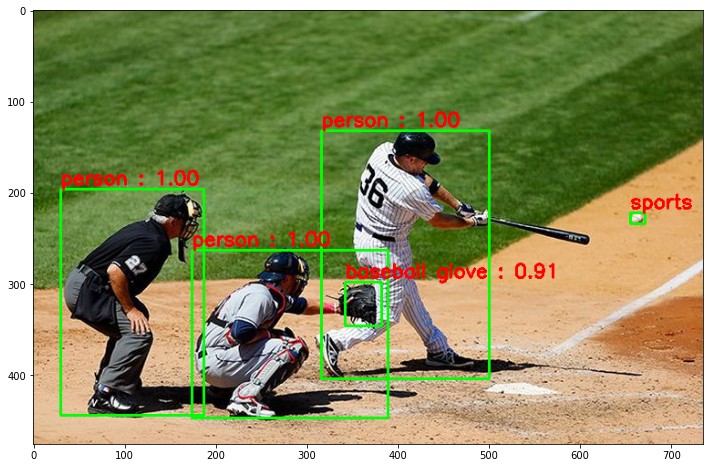

In [78]:
img = cv2.imread('/content/data/baseball01.jpg')

draw_img = get_detected_img(cv_net, img, score_threshold=0.5, is_print=True)
img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,12))
plt.imshow(img_rgb)
plt.show()

In [79]:
def do_detect_video(cv_net, input_path, output_path, score_threshold, is_print):
  cap = cv2.VideoCapture(input_path)

  codec = cv2.VideoWriter_fourcc(*'XVID')
  
  vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
  vid_fps = cap.get(cv2.CAP_PROP_FPS) 
  
  frame_cnt = cap.get(cv2.CAP_PROP_FRAME_COUNT)
  print("Frame Count : {}".format(frame_cnt))

  vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size)

  while True:
    hasFrame, img_frame = cap.read()
    if not hasFrame:
      print("처리할 Frame이 없습니다.")
      break
    
    frame = get_detected_img(cv_net, img_frame, score_threshold=score_threshold, is_print=is_print)
    vid_writer.write(frame)
  
  vid_writer.release()
  cap.release()

In [80]:
do_detect_video(cv_net, '/content/data/Jonh_Wick_small.mp4', '/content/data/Jonh_Wick_small_out1.mp4', 0.2, True)

Frame Count : 58.0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Time : 0
Detection Ti